## Kernel-PCA
In the last lecture we saw how to apply the kernel trick to create a nonlinear formulation of support vector machines. The idea was to replace scalar products of the features with the kernel function of those features, which resulted in the product being calculated in a higher-dimensional space without us having to actually calculate the data points in that higher space. The kernel trick can also be used to create a nonlinear version of principal component analysis.

The idea of PCA is to diagonalize the data covariance matrix $\mathbf C = \frac 1 N \mathbf X \mathbf X^\text{T} = \frac 1 N \sum_i^N x_i x_i^\text{T}$, where $\mathbf X$ is the matrix containing the $N$ data points for a problem and $x_i$ are the feature vectors for each sample. With the kernel trick, the higher-dimensional covariance matrix becomes $\mathbf C^\prime = \frac 1 N \sum_i^N \phi(x_i)\phi^\text{T}(x_i)$ (see [Quan Wang's paper about active shape modes and facial recognition](https://arxiv.org/pdf/1207.3538.pdf) for more info). 

Equipped with this nonlinear version of PCA, we can apply it to highly nonlinear datasets, like the encircled rings from last lecture:

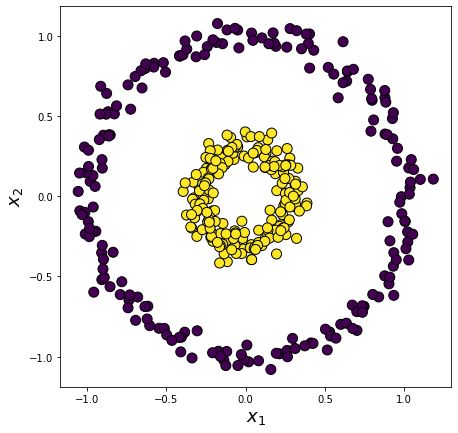

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(7,7))

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18)

plt.scatter(X[:,0], X[:,1], c=y, s=100, ec='k')

These are clearly not linearly separable. Let's see what happens if we try different kernel methods:

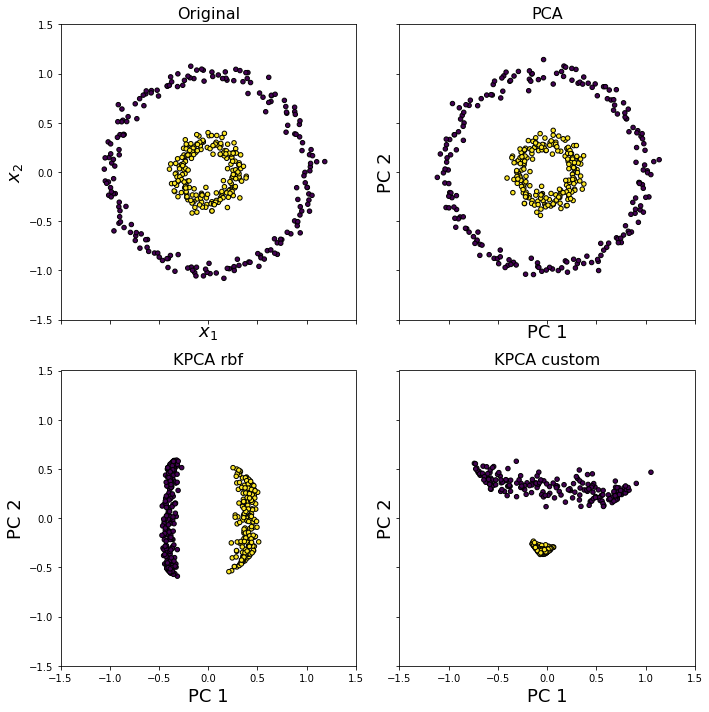

In [6]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA

def custom_kernel(X, Y):
    # this function returns the Gram matrix of X and Y,
    # the entries G_ij are the scalar products <x_i,y_i>
    # try out different integer powers to see what happens
    # why do only certain values work?
    return (X**2).dot((Y**2).T)

# linear PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# kernel-PCA with radial basis functions
rbf = KernelPCA(kernel="rbf", gamma=2)
X_rbf = rbf.fit_transform(X)

# custom kernel
custom = KernelPCA(kernel="precomputed")
X_custom = custom.fit_transform(custom_kernel(X,X))

# put values in lists for easier plotting
Xs = [X, X_pca, X_rbf, X_custom]
titles = [r"Original", 
          r"PCA", 
          r"KPCA rbf", 
          r"KPCA custom"]


fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
axes = axes.flatten()

for i,ax in enumerate(axes):
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel(r"PC 1", fontsize=18)
    ax.set_ylabel(r"PC 2", fontsize=18)
    ax.set_title(label=titles[i], fontsize=16)
    
    ax.scatter(Xs[i][:,0], Xs[i][:,1], c=y, s=20, edgecolor='k')


axes[0].set_xlabel(r"$x_1$", fontsize=18)
axes[0].set_ylabel(r"$x_2$", fontsize=18)

plt.tight_layout()

There's no chance to separate the data with linear PCA, but kernel-PCA finds ways if good kernels are provided (try this with the polynomial kernel. Does it also work?). In the last example, a custom kernel is provided to the algorithm, which sometimes yields the best results if the dataset and its topology is known well.

For dimensionality reduction, we'd actually choose fewer features than our dataset is originally comprised of. Imagine projecting the data graphs in the lower row onto an axis. Clearly, the points belonging to different classes in the original set are now well separated and identifiable by simply investigated a single dimension.